### Problem Statement :

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 


### Business Goal :

X Education need help determining which leads have the best chance of turning into paying customers, or the most promising prospects.

The company needs a model where each lead is assigned a score, meaning that clients with higher lead scores will probably convert more frequently than those with lower scores.

According to the CEO specifically, the targeted lead conversion rate is about 80%.

## 1: Reading and Understanding the Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [3]:
leadsInfo = pd.read_csv('Leads.csv')
leadsInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leadsInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leadsInfo.shape

(9240, 37)

In [6]:
leadsInfo.isnull()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9238,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [7]:
leadsInfo.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2: Data Cleaning

In [8]:
missing = round(100*(leadsInfo.isnull().sum()/len(leadsInfo.index)), 2)
missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

More than 25% of the values in some columns are null.

In [9]:
## Check for duplicate values in the dataset

leadsInfo[leadsInfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [10]:
# Convert 'Select' values to NaN.

leadsInfo['Specialization'] = leadsInfo['Specialization'].replace('Select', np.nan)
leadsInfo['How did you hear about X Education'] = leadsInfo['How did you hear about X Education'].replace('Select', np.nan)
leadsInfo['Lead Profile'] = leadsInfo['Lead Profile'].replace('Select', np.nan)
leadsInfo['City'] = leadsInfo['City'].replace('Select', np.nan)

In [11]:
missing = round(100*(leadsInfo.isnull().sum()/len(leadsInfo.index)), 2)
missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Let us drop the following columns that have more than 30% null values
leadsInfo = leadsInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [13]:
missing = round(100*(leadsInfo.isnull().sum()/len(leadsInfo.index)), 2)
missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

The null values in the following columns: - Lead Source - Country - Visits Overall - Pages Viewed Each Visit - Most Recent Activity
What do you do for a living now? - What factors are most important to you while selecting a course?

Let's examine and determine if we should remove the columns or impute values to the aforementioned column.

In [14]:
leadsInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
country_percent = round(100*len(leadsInfo[leadsInfo['Country'] == 'India'])/len(leadsInfo['Country']),2)
country_percent

70.26

In [16]:
# We will eliminate the column since "India" appears in the Country field around 70% of the time and has about 27% of missing data.

leadsInfo = leadsInfo.drop(['Country'], axis=1)

In [17]:
leadsInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
leadsInfo['Lead Source'] = leadsInfo['Lead Source'].replace('google', 'Google')
leadsInfo['Lead Source'] = leadsInfo['Lead Source'].replace(np.nan, 'Google')

In [19]:
leadsInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [20]:
leadsInfo['TotalVisits'].median()

3.0

In [21]:
leadsInfo['TotalVisits'] = leadsInfo['TotalVisits'].replace(np.nan, leadsInfo['TotalVisits'].median())

In [22]:
leadsInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [23]:
leadsInfo['Page Views Per Visit'].median()

2.0

In [24]:
leadsInfo['Page Views Per Visit'] = leadsInfo['Page Views Per Visit'].replace(np.nan, leadsInfo['Page Views Per Visit'].median())

In [25]:
leadsInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
# Given the lack of information on the customer's most recent behaviour, we may create a new category for the null values named "Not Sure."
leadsInfo['Last Activity'] = leadsInfo['Last Activity'].replace(np.nan, 'Not Sure')

In [27]:
leadsInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leadsInfo['What is your current occupation'] = leadsInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [29]:
leadsInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
most_percent = round(100*len(leadsInfo[leadsInfo['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leadsInfo['What matters most to you in choosing a course']),2)
most_percent

70.65

In [31]:
#Better Career Prospects appears in the What matters most to you when picking a course column around 70% of the time, and the column also contains about 29% missing data, thus we're going to remove the column.

leadsInfo = leadsInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [32]:
missing = round(100*(leadsInfo.isnull().sum()/len(leadsInfo.index)), 2)
missing

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

Now, we have either imputed all null values in the columns or removed the ones where more than 70% of the data is centred on a single value.

In [33]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leadsInfo = leadsInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [34]:
leadsInfo.shape

(9240, 20)

In [35]:
# Examining anomalies at 25%, 50%, 75%, 90%, and 95% and higher
leadsInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


It is evident from the above that there is an outlier in the columns for TotalVisits and Page Views Per Visit.

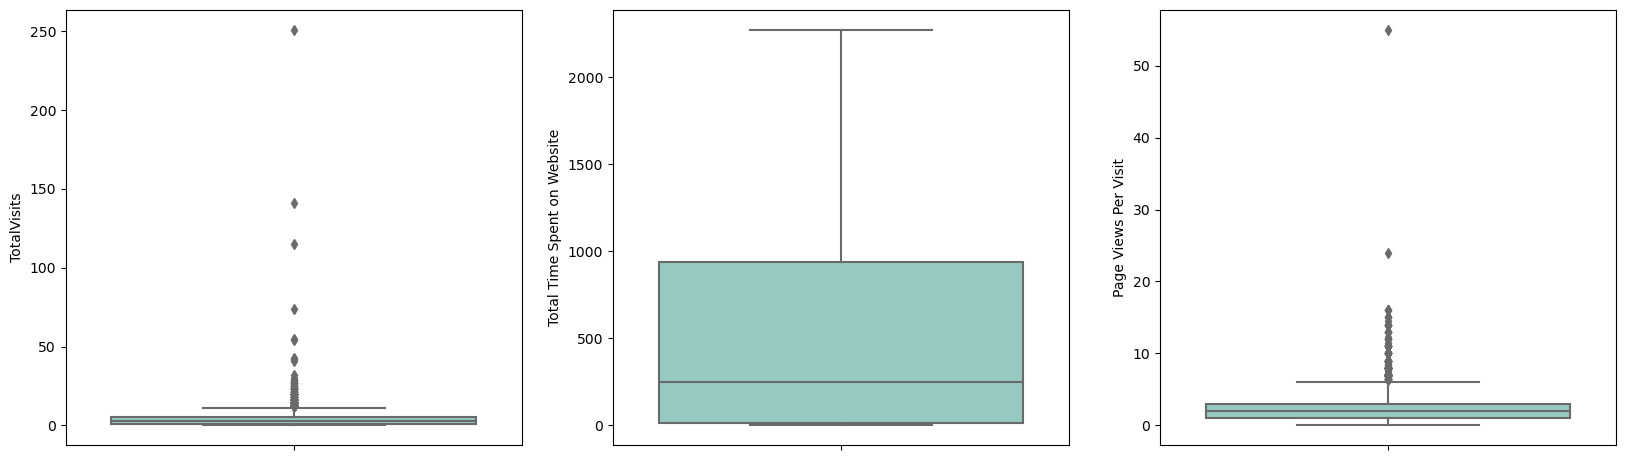

In [36]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 26))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadsInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadsInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadsInfo)
plt.show()

In [37]:
# Removing values beyond 99% for Total Visits

quartile_visits = leadsInfo['TotalVisits'].quantile(0.99)
leadsInfo = leadsInfo[leadsInfo["TotalVisits"] < quartile_visits]
leadsInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [38]:
leadsInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [39]:
# Removing values beyond 99% for page Views Per Visit

quartile_visits_page = leadsInfo['Page Views Per Visit'].quantile(0.99)
leadsInfo = leadsInfo[leadsInfo["Page Views Per Visit"] < quartile_visits_page]
leadsInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [40]:
leadsInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [41]:
num_data = round(100*(len(leadsInfo)/9240),2)
num_data

97.72

Currently, 98% of the data has been kept after the data was cleansed.

### 3: Data Analysis
Now let's attempt to interpret the data according to the impact of each column on the conversion rates.

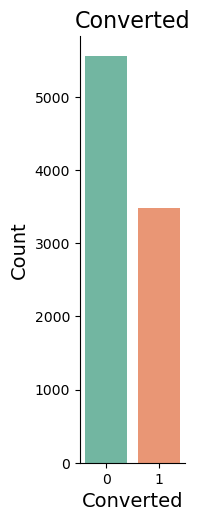

In [42]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leadsInfo, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 16)
plt.xlabel("Converted", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

    
plt.show()

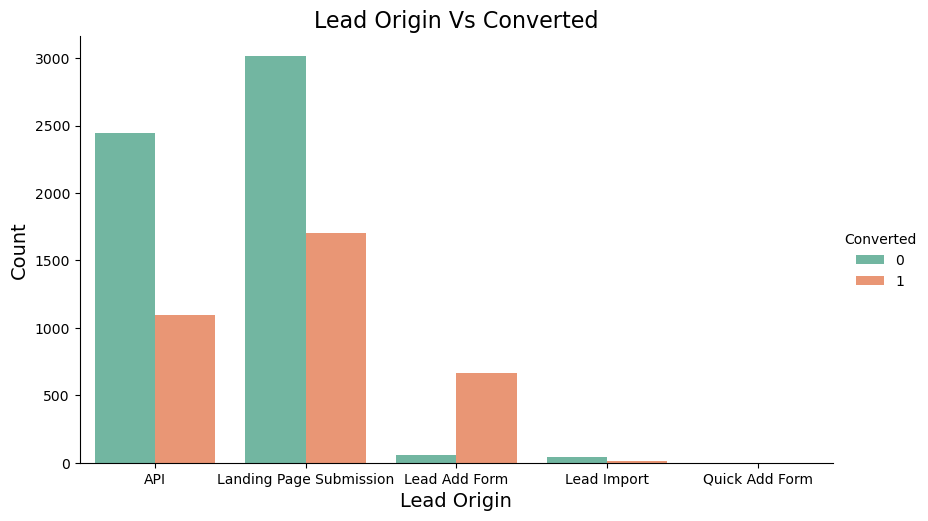

In [43]:
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 16)
plt.xlabel("Lead Origin", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

The graph above shows that landing page submission resulted in the highest conversion rate. Additionally, just one request from the fast add form was converted.

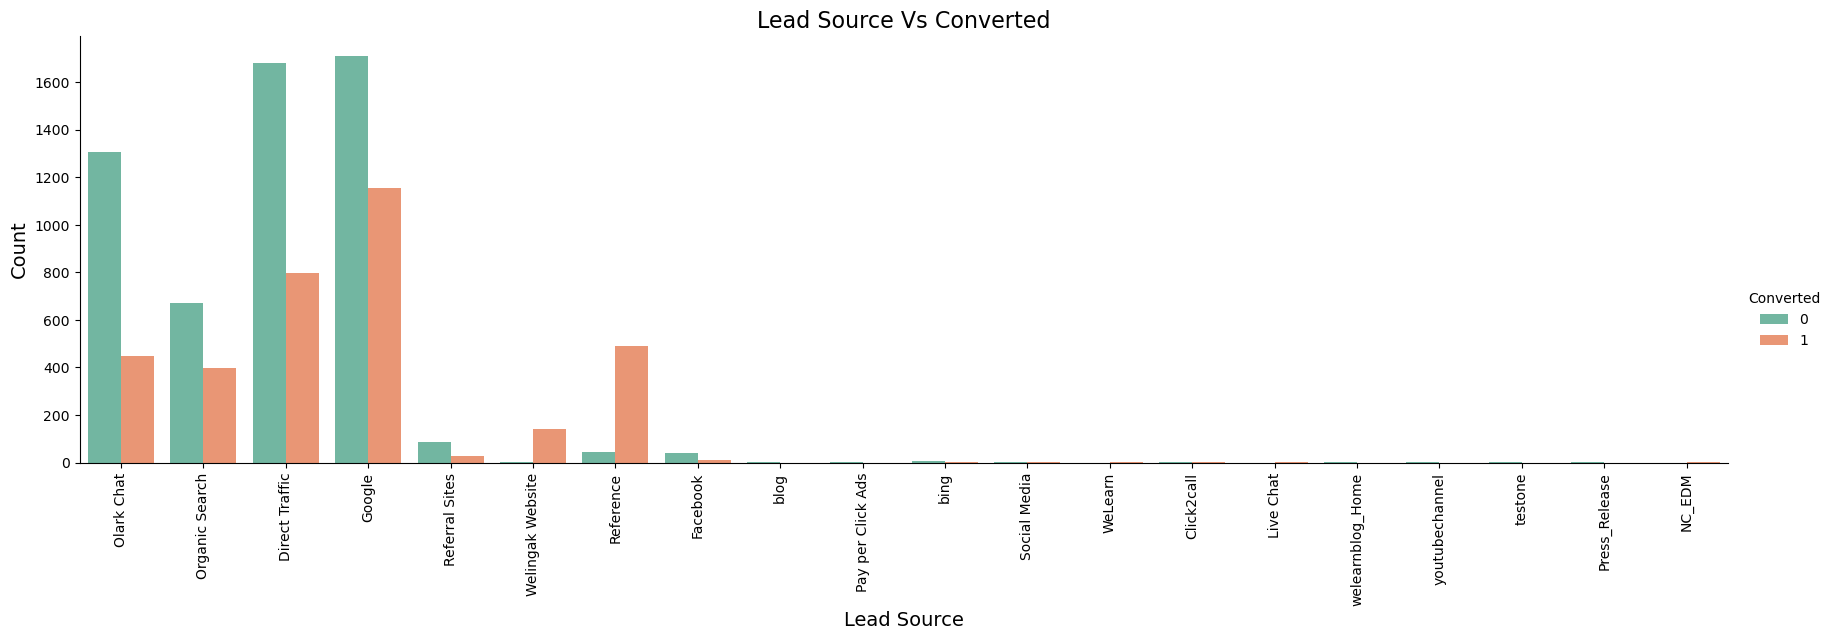

In [44]:
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 16)
plt.xlabel("Lead Source", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

It is evident from the above graph that Google is the primary lead source for conversions.

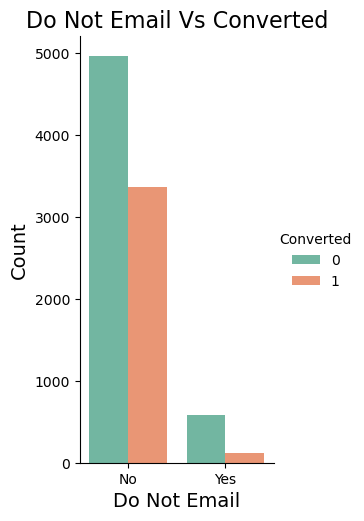

In [45]:
plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 16)
plt.xlabel("Do Not Email", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

According to the graph above, a significant conversion from the sent emails has occurred.

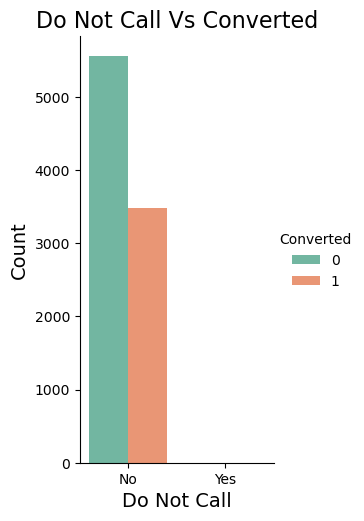

In [46]:
plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 16)
plt.xlabel("Do Not Call", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

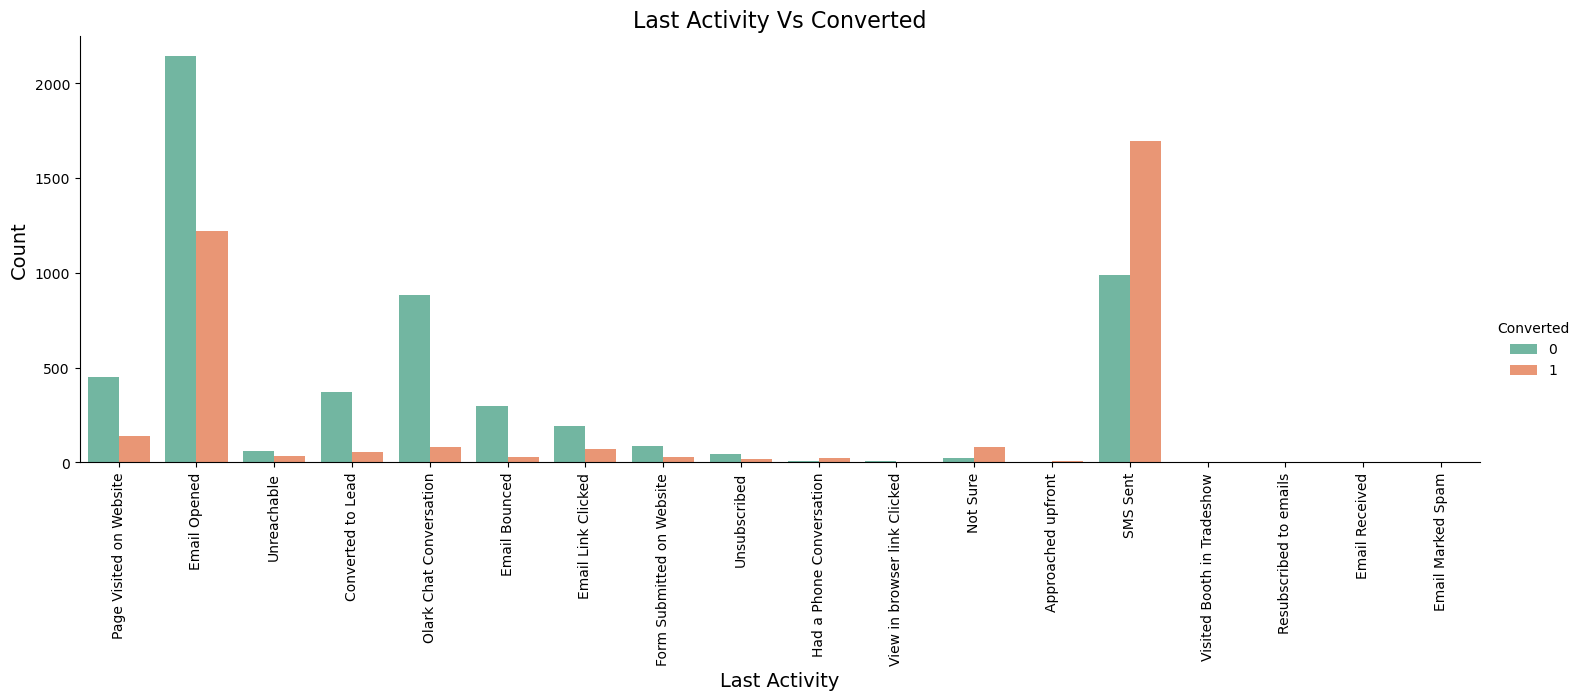

In [47]:

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 16)
plt.xlabel("Last Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

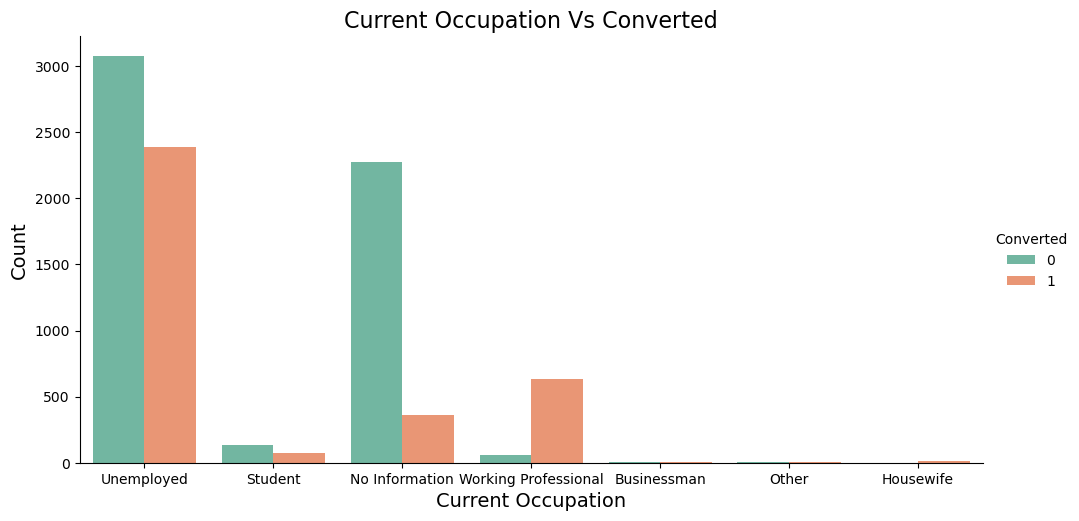

In [48]:
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 16)
plt.xlabel("Current Occupation", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

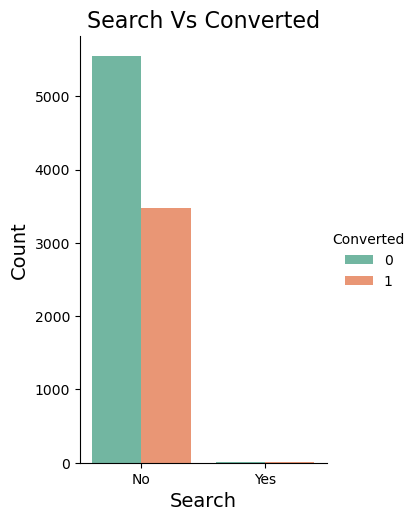

In [49]:
plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 16)
plt.xlabel("Search", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

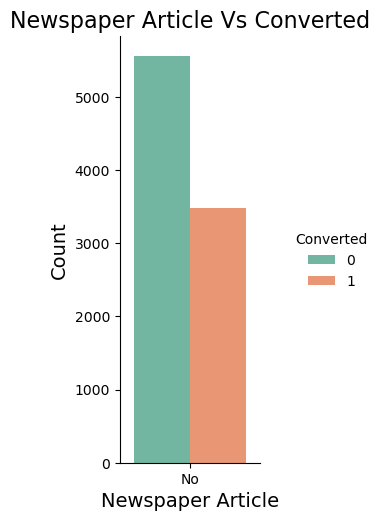

In [50]:
plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 16)
plt.xlabel("Newspaper Article", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

It is safe to remove the "Newspaper Article" column as it currently only has one value for every row, "No".

In [51]:
leadsInfo = leadsInfo.drop(['Newspaper Article'], axis=1)

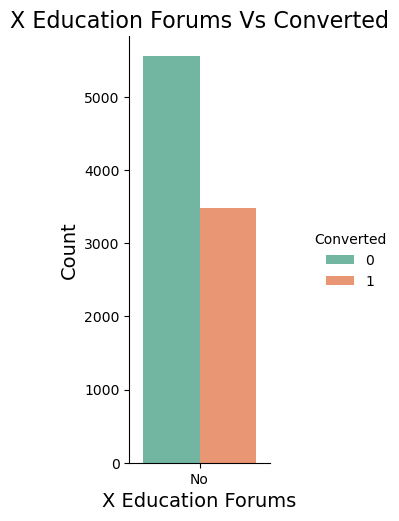

In [52]:
plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 16)
plt.xlabel("X Education Forums", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

It is safe to remove the "X Education Forums" column as it currently only contains the value "No" for every entry.

In [53]:
# Dropping X Education Forum column

leadsInfo = leadsInfo.drop(['X Education Forums'], axis=1)

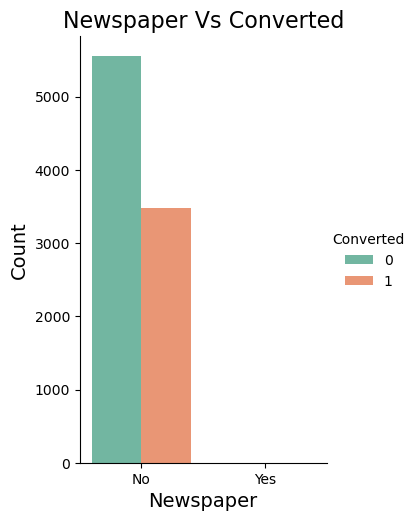

In [54]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 16)
plt.xlabel("Newspaper", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

We can safely remove the Newspaper column as it only contains one row with the value "Yes," this lead did not convert, and the remaining values are all "No."

In [55]:
# Drop Newspaper column

leadsInfo = leadsInfo.drop(['Newspaper'], axis=1)

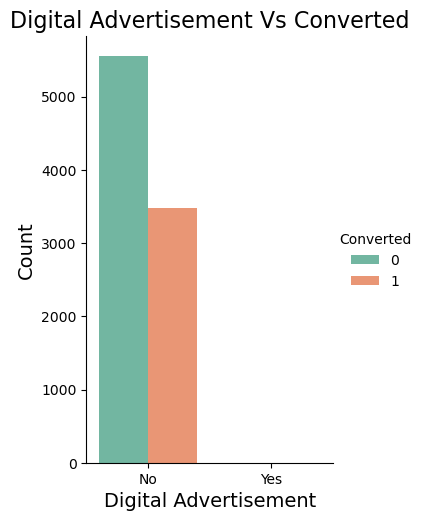

In [56]:
plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 16)
plt.xlabel("Digital Advertisement", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

As can be seen above, two leads resulted from digital advertisements, one of which was converted.

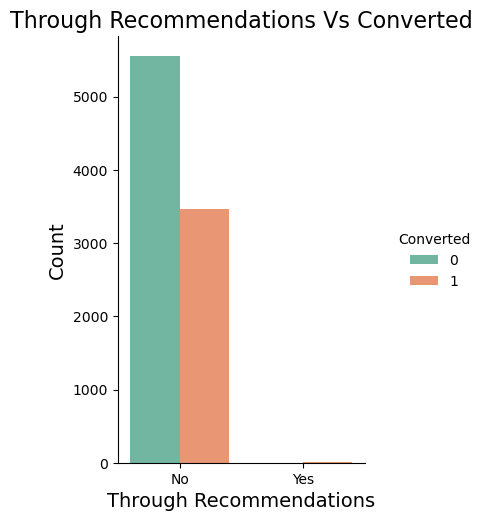

In [57]:
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 16)
plt.xlabel("Through Recommendations", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

It is evident that five of the six leads that originated from referrals converted.

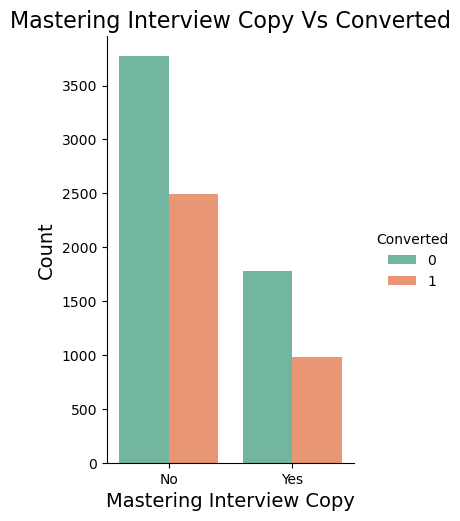

In [58]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadsInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 16)
plt.xlabel("Mastering Interview Copy", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

Leads that decline to receive a complimentary copy of Mastering Interviews have a high conversion rate.

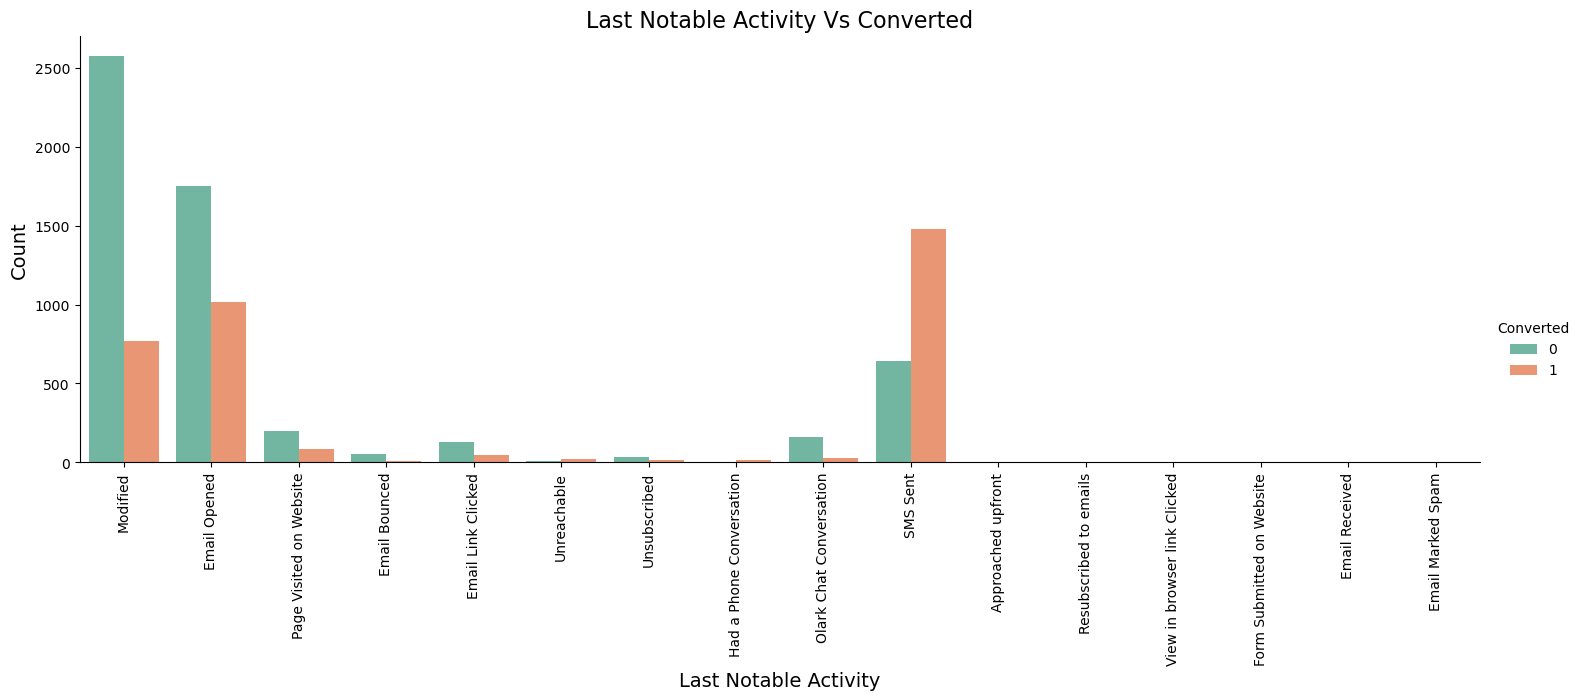

In [59]:
plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadsInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 16)
plt.xlabel("Last Notable Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

It is evident that "SMS Sent" has a high conversion rate.

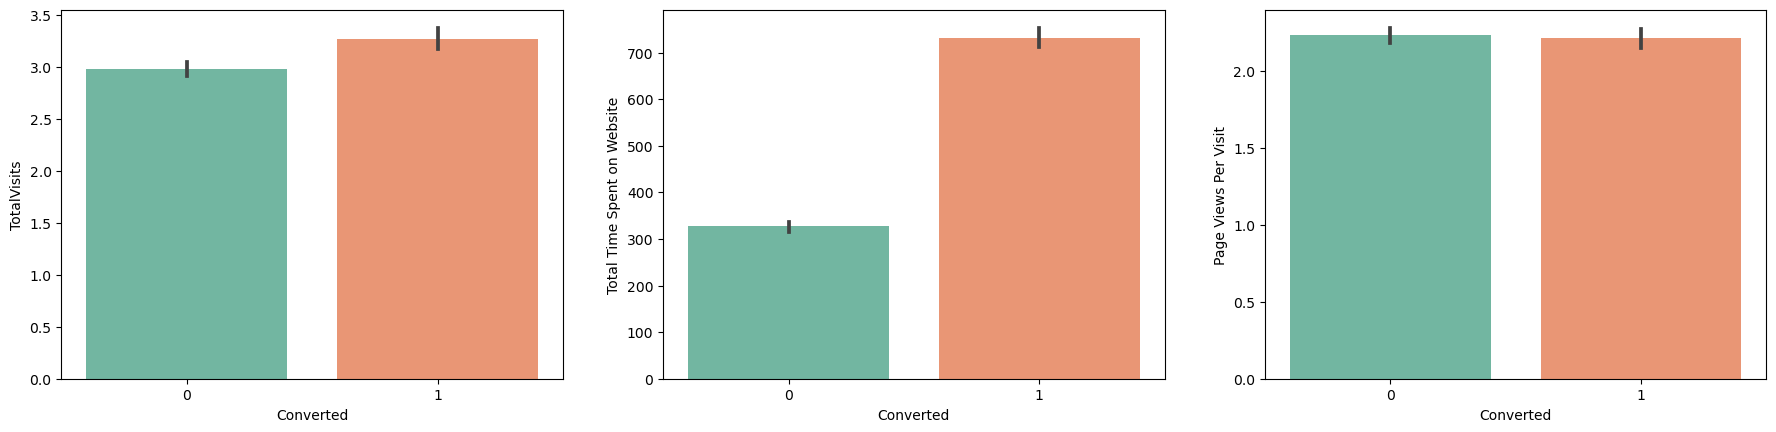

In [60]:
plt.figure(figsize=(22,22))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadsInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadsInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadsInfo)
plt.show()

Total Visits, Total Time Spent on Website, and Page Views Per Visit all had good conversion rates.

## 4: Data Preparation

In [61]:
varlist =  varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leadsInfo[varlist] = leadsInfo[varlist].apply(binary_map)

In [62]:
# Lead Origin : 

d_lead_origin = pd.get_dummies(leadsInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leadsInfo = pd.concat([leadsInfo, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leadsInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leadsInfo = pd.concat([leadsInfo,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leadsInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadsInfo = pd.concat([leadsInfo,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leadsInfo['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leadsInfo = pd.concat([leadsInfo,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leadsInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadsInfo = pd.concat([leadsInfo,d_last_notable_activity1], axis=1)

leadsInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
# Dropping columns from the leadInfo

# Prospect ID
# Lead Numbers
# Lead Origin
# Lead Source
# Last Activity
# What is your current occupation
# Last Notable Activity

leadsInfo = leadsInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [64]:
leadsInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [65]:
missing = round(100*(leadsInfo.isnull().sum()/len(leadsInfo.index)), 2)
missing

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64

In [66]:
leadsInfo.shape

(9029, 71)

We won't be utilising a # heat map to examine the association because there are around 71 columns, as the large amount of data prevents us from drawing any conclusions from it.


### 5: Test-Train 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = leadsInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
y = leadsInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### 6: Rescaling with MinMax 

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaling.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [72]:
convertion = (sum(leadsInfo['Converted'])/len(leadsInfo['Converted'].index))*100
convertion

38.50924797873519

### 7: Model Build
#### Regression model

In [73]:
import statsmodels.api as sm

In [74]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 16 Nov 2023   Deviance:                   1.2812e+05
Time:                        13:58:59   Pearson chi2:                 6.26e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.731e+15    6.4e+07   5.83e+07      0.000    3.73e+15    3.73e+15
Do Not Email                                     -6.582e+14   4.48e+06  -1.47e+08      0.000   -6.58e+14   -6.58e+14
Do Not Call                                        7.71e+15   4.76e+07   1.62e+08      0.000    7.71e+15    7.71e+15
TotalVisits                                       1.779e+14   7.66e+06   2.32e+07      0.000    1.78e+14    1.78e+14
Total Time Spent on Website                       8.115e+14   4.01e+06   2.02e+08      0.000    8.11e+14    8.11e+14
Page Views Per Visit                              2.655e+14   6.53e+06   4.06e+07      0.000    2.66e+14    2.66e+14
Search                                           -5.086e+14   2.44e+07  -2.08e+07      0.000   -5.09e+14   -5.09e+14
Digital Advertisement                             4.057e+14   4.76e+07   8.53e+06      0.000    4.06e+14    4.06e+14
Through Recommendations                             1.6e+15    4.2e+07   3.81e+07      0.000     1.6e+15     1.6e+15
A free copy of Mastering The Interview            1.584e+14   2.69e+06   5.88e+07      0.000    1.58e+14    1.58e+14
LeadOrigin_API                                   -6.182e+15   6.74e+07  -9.17e+07      0.000   -6.18e+15   -6.18e+15
LeadOrigin_Landing Page Submission                -6.23e+15   6.74e+07  -9.24e+07      0.000   -6.23e+15   -6.23e+15
LeadOrigin_Lead Add Form                         -5.062e+15   6.86e+07  -7.38e+07      0.000   -5.06e+15   -5.06e+15
LeadOrigin_Lead Import                           -5.262e+15   8.27e+07  -6.36e+07      0.000   -5.26e+15   -5.26e+15
LeadSource_Click2call                             5.646e+15   4.69e+07    1.2e+08      0.000    5.65e+15    5.65e+15
LeadSource_Direct Traffic                         7.221e+14   1.17e+07   6.18e+07      0.000    7.22e+14    7.22e+14
LeadSource_Facebook                               3.403e+14   4.62e+07   7.37e+06      0.000     3.4e+14     3.4e+14
LeadSource_Google                                 9.093e+14   1.15e+07    7.9e+07      0.000    9.09e+14    9.09e+14
LeadSource_Live Chat                              3.597e+15   4.67e+07    7.7e+07      0.000     3.6e+15     3.6e+15
LeadSource_Olark Chat                             7.648e+14   1.18e+07   6.46e+07      0.000    7.65e+14    7.65e+14
LeadSource_Organic Search                         8.018e+14   1.18e+07   6.81e+07      0.000    8.02e+14    8.02e+14
LeadSource_Pay per Click Ads                        21.9576   3.69e-07   5.96e+07      0.000      21.958      21.958
LeadSource_Press_Release                            28.9158   3.39e-07   8.53e+07      0.000      28.916      28.916
LeadSource_Reference                     

### 8: RFE

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False])

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 2),
 ('Digital Advertisement', False, 50),
 ('Through Recommendations', False, 35),
 ('A free copy of Mastering The Interview', False, 42),
 ('LeadOrigin_API', False, 14),
 ('LeadOrigin_Landing Page Submission', False, 13),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 25),
 ('LeadSource_Click2call', False, 34),
 ('LeadSource_Direct Traffic', False, 21),
 ('LeadSource_Facebook', False, 15),
 ('LeadSource_Google', False, 32),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 31),
 ('LeadSource_Pay per Click Ads', False, 51),
 ('LeadSource_Press_Release', False, 55),
 ('LeadSource_Reference', False, 5),
 ('LeadSource_Referral Sites', False, 30),
 ('LeadSource_Social Media', False, 46),
 ('LeadSource_WeLearn', False, 5

In [79]:
columns = X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [80]:
# Model 2
X_train_s = sm.add_constant(X_train[columns])
log2 = sm.GLM(y_train,X_train_s, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.7
Date:                Thu, 16 Nov 2023   Deviance:                       5111.3
Time:                        13:59:16   Pearson chi2:                 6.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5475      0.101    -25.325      0.000      -2.745      -2.350
Do Not Email                                    -1.3720      0.167     -8.236      0.000      -1.699      -1.046
TotalVisits                                      1.4314      0.243      5.900      0.000       0.956       1.907
Total Time Spent on Website                      4.4812      0.167     26.873      0.000       4.154       4.808
LeadOrigin_Lead Add Form                         3.7964      0.203     18.687      0.000       3.398       4.195
LeadSource_Olark Chat                            1.7592      0.123     14.283      0.000       1.518       2.001
LeadSource_Welingak Website                      2.1643      0.743      2.915      0.004       0.709       3.620
LastActivity_Approached upfront                 23.0883   2.64e+04      0.001      0.999   -5.17e+04    5.17e+04
LastActivity_Had a Phone Conversation            0.4211      0.931      0.452      0.651      -1.403       2.246
LastActivity_Olark Chat Conversation            -1.2536      0.169     -7.436      0.000      -1.584      -0.923
LastActivity_SMS Sent                            1.3952      0.076     18.442      0.000       1.247       1.544
CurrentOccupation_Housewife                     23.9720   2.39e+04      0.001      0.999   -4.67e+04    4.68e+04
CurrentOccupation_No Information                -1.2804      0.089    -14.371      0.000      -1.455      -1.106
CurrentOccupation_Working Professional           2.6208      0.201     13.054      0.000       2.227       3.014
LastNotableActivity_Had a Phone Conversation     2.8710      1.501      1.912      0.056      -0.072       5.814
LastNotableActivity_Unreachable                  1.7840      0.552      3.235      0.001       0.703       2.865
================================================================================================================
"""

In [81]:
# deleting a column LastActivity_Coming_First off, since its p-value is large, it is not significant.
columns = columns.drop('LastActivity_Approached upfront',1)

In [82]:
# Model 3

X_train_s = sm.add_constant(X_train[columns])
log3 = sm.GLM(y_train,X_train_s, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.9
Date:                Thu, 16 Nov 2023   Deviance:                       5117.9
Time:                        13:59:19   Pearson chi2:                 6.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4098
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5449      0.101    -25.309      0.000      -2.742      -2.348
Do Not Email                                    -1.3743      0.167     -8.250      0.000      -1.701      -1.048
TotalVisits                                      1.4293      0.243      5.891      0.000       0.954       1.905
Total Time Spent on Website                      4.4868      0.167     26.912      0.000       4.160       4.814
LeadOrigin_Lead Add Form                         3.7974      0.203     18.703      0.000       3.399       4.195
LeadSource_Olark Chat                            1.7695      0.123     14.378      0.000       1.528       2.011
LeadSource_Welingak Website                      2.1629      0.743      2.913      0.004       0.708       3.618
LastActivity_Had a Phone Conversation            0.4172      0.931      0.448      0.654      -1.408       2.242
LastActivity_Olark Chat Conversation            -1.2622      0.169     -7.490      0.000      -1.593      -0.932
LastActivity_SMS Sent                            1.3914      0.076     18.396      0.000       1.243       1.540
CurrentOccupation_Housewife                     22.9678   1.45e+04      0.002      0.999   -2.83e+04    2.84e+04
CurrentOccupation_No Information                -1.2847      0.089    -14.423      0.000      -1.459      -1.110
CurrentOccupation_Working Professional           2.6178      0.201     13.038      0.000       2.224       3.011
LastNotableActivity_Had a Phone Conversation     2.8737      1.502      1.914      0.056      -0.070       5.817
LastNotableActivity_Unreachable                  1.7815      0.552      3.230      0.001       0.700       2.863
================================================================================================================
"""

In [83]:
# Column CurrentOccupation_Housewife is being removed since its high pvalue indicates that it is not significant.

columns = columns.drop('CurrentOccupation_Housewife',1)

In [84]:
# Model 4

X_train_s = sm.add_constant(X_train[columns])
log4 = sm.GLM(y_train,X_train_s, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.5
Date:                Thu, 16 Nov 2023   Deviance:                       5131.0
Time:                        13:59:22   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5303      0.100    -25.244      0.000      -2.727      -2.334
Do Not Email                                    -1.3792      0.167     -8.281      0.000      -1.706      -1.053
TotalVisits                                      1.4148      0.242      5.838      0.000       0.940       1.890
Total Time Spent on Website                      4.4828      0.167     26.918      0.000       4.156       4.809
LeadOrigin_Lead Add Form                         3.8017      0.203     18.759      0.000       3.405       4.199
LeadSource_Olark Chat                            1.7598      0.123     14.323      0.000       1.519       2.001
LeadSource_Welingak Website                      2.1483      0.742      2.894      0.004       0.693       3.603
LastActivity_Had a Phone Conversation            0.4065      0.931      0.437      0.662      -1.418       2.231
LastActivity_Olark Chat Conversation            -1.2666      0.168     -7.517      0.000      -1.597      -0.936
LastActivity_SMS Sent                            1.3835      0.076     18.312      0.000       1.235       1.532
CurrentOccupation_No Information                -1.2889      0.089    -14.479      0.000      -1.463      -1.114
CurrentOccupation_Working Professional           2.6103      0.201     13.006      0.000       2.217       3.004
LastNotableActivity_Had a Phone Conversation     2.8768      1.502      1.916      0.055      -0.066       5.820
LastNotableActivity_Unreachable                  1.7751      0.552      3.217      0.001       0.694       2.857
================================================================================================================
"""

In [85]:
# Since column LastActivity_Had a Phone Conversation has a high pvalue and is thus unimportant, it is being removed.

columns = columns.drop('LastActivity_Had a Phone Conversation',1)

In [86]:
# Model 5

X_train_s = sm.add_constant(X_train[columns])
log5 = sm.GLM(y_train,X_train_s, family = sm.families.Binomial())
res = log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.6
Date:                Thu, 16 Nov 2023   Deviance:                       5131.2
Time:                        13:59:24   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5289      0.100    -25.245      0.000      -2.725      -2.333
Do Not Email                                    -1.3799      0.167     -8.285      0.000      -1.706      -1.053
TotalVisits                                      1.4130      0.242      5.831      0.000       0.938       1.888
Total Time Spent on Website                      4.4834      0.167     26.923      0.000       4.157       4.810
LeadOrigin_Lead Add Form                         3.8029      0.203     18.766      0.000       3.406       4.200
LeadSource_Olark Chat                            1.7590      0.123     14.319      0.000       1.518       2.000
LeadSource_Welingak Website                      2.1462      0.742      2.891      0.004       0.691       3.601
LastActivity_Olark Chat Conversation            -1.2671      0.168     -7.521      0.000      -1.597      -0.937
LastActivity_SMS Sent                            1.3826      0.076     18.306      0.000       1.235       1.531
CurrentOccupation_No Information                -1.2894      0.089    -14.486      0.000      -1.464      -1.115
CurrentOccupation_Working Professional           2.6114      0.201     13.014      0.000       2.218       3.005
LastNotableActivity_Had a Phone Conversation     3.2826      1.180      2.783      0.005       0.971       5.595
LastNotableActivity_Unreachable                  1.7744      0.552      3.216      0.001       0.693       2.856
================================================================================================================
"""

We will proceed with Model 5 for more investigation as it appears to be stable with substantial p-values.


In [87]:
y_train_prediction = res.predict(X_train_s)
y_train_prediction[:10]

2240    0.617042
113     0.746405
4132    0.809212
5573    0.097713
1109    0.024373
2282    0.033636
2976    0.931807
8431    0.443183
2770    0.781424
5790    0.994872
dtype: float64

In [88]:
y_train_prediction = y_train_prediction.values.reshape(-1)
y_train_prediction[:10]

array([0.61704243, 0.74640532, 0.80921196, 0.09771278, 0.0243728 ,
       0.03363597, 0.93180703, 0.44318344, 0.78142445, 0.99487224])

In [89]:
# Creating a dataframe
y_train_finalprediction = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_prediction})
y_train_finalprediction['LeadId'] = y_train.index
y_train_finalprediction.head()

,Converted,Converted_Prob,LeadId
0,0,0.617042,2240
1,0,0.746405,113
2,1,0.809212,4132
3,0,0.097713,5573
4,0,0.024373,1109


In [90]:
# 'predicted' is a new column that is created with 1 if Converted_Prob > 0.5 and else Zero
y_train_finalprediction['predicted'] = y_train_finalprediction.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_finalprediction.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.617042,2240,1
1,0,0.746405,113,1
2,1,0.809212,4132,1
3,0,0.097713,5573,0
4,0,0.024373,1109,0


In [91]:
# checking the metrics and accuracy

from sklearn import metrics

In [92]:
conf_matrix = metrics.confusion_matrix(y_train_finalprediction.Converted, y_train_finalprediction.predicted )
conf_matrix

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [93]:
# checking the overall accuracy.

metrics.accuracy_score(y_train_finalprediction.Converted, y_train_finalprediction.predicted)

0.8113924050632911

The accuracy rate is good, at about 81%. But since we can't rely just on the accuracy measures, we also need to compute the other metrics.

Check for VIF's

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.05
2,Total Time Spent on Website,1.95
4,LeadSource_Olark Chat,1.57
8,CurrentOccupation_No Information,1.46
6,LastActivity_Olark Chat Conversation,1.45
7,LastActivity_SMS Sent,1.45
3,LeadOrigin_Lead Add Form,1.43
5,LeadSource_Welingak Website,1.30
9,CurrentOccupation_Working Professional,1.18
0,Do Not Email,1.07


In [95]:
# Every variable has a high VIF value. Therefore, we don't need to remove any additional variables, and we may continue using this model alone to make predictions.

true_positive = conf_matrix[1,1] 
true_negatives = conf_matrix[0,0] 
false_positives = conf_matrix[0,1] 
false_negatives = conf_matrix[1,0]
 

In [96]:
true_positive / float(true_positive+false_negatives)

0.7030869212022746

In [97]:
true_negatives / float(true_negatives+false_positives)

0.8805080352514256

In [98]:
false_positives/ float(true_negatives+false_positives)

0.11949196474857439

In [99]:
true_positive / float(true_positive+false_positives)

0.7896897810218978

In [100]:
true_negatives / float(true_negatives+ false_negatives)

0.8229166666666666

### 9: ROC Curve

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_finalprediction.Converted, y_train_finalprediction.Converted_Prob, 
                                         drop_intermediate = False )

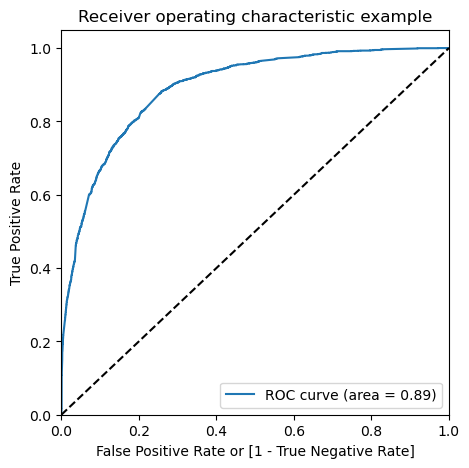

In [103]:
draw_roc(y_train_finalprediction.Converted, y_train_finalprediction.Converted_Prob)

### 10: Finding Cutoff Point

In [104]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_finalprediction[i]= y_train_finalprediction.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_finalprediction.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.617042,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.746405,113,1,1,1,1,1,1,1,1,1,0,0
2,1,0.809212,4132,1,1,1,1,1,1,1,1,1,1,0
3,0,0.097713,5573,0,1,0,0,0,0,0,0,0,0,0
4,0,0.024373,1109,0,1,0,0,0,0,0,0,0,0,0


In [105]:
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_finalprediction.Converted, y_train_finalprediction[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.594620  0.982941  0.346812
0.2   0.2  0.764241  0.916734  0.666926
0.3   0.3  0.794304  0.885053  0.736392
0.4   0.4  0.810759  0.776604  0.832556
0.5   0.5  0.811392  0.703087  0.880508
0.6   0.6  0.805063  0.636881  0.912390
0.7   0.7  0.782595  0.524370  0.947382
0.8   0.8  0.748892  0.404143  0.968896
0.9   0.9  0.718038  0.296101  0.987299


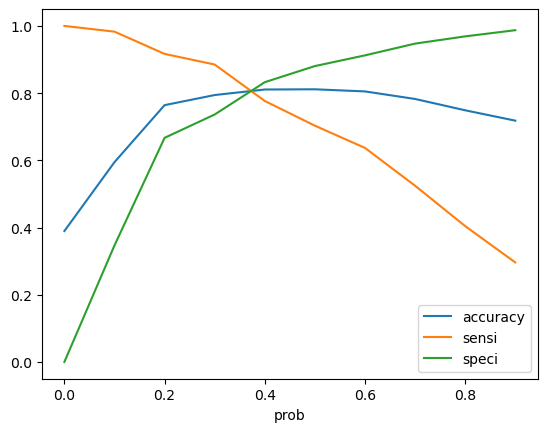

In [106]:
# Let's plot specificity and accuracy sensitivity for different probability.

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the curve above, the best value to use as a cutoff probability is 0.37.

In [107]:
# Let us make the final prediction using 0.37 as the cut off

y_train_finalprediction['final_predict'] = y_train_finalprediction.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_finalprediction.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
0,0,0.617042,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.746405,113,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.809212,4132,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.097713,5573,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.024373,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [108]:
y_train_finalprediction['lead_score'] = y_train_finalprediction.Converted_Prob.map(lambda x: round(x*100))
y_train_finalprediction.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict,lead_score
0,0,0.617042,2240,1,1,1,1,1,1,1,1,0,0,0,1,62
1,0,0.746405,113,1,1,1,1,1,1,1,1,1,0,0,1,75
2,1,0.809212,4132,1,1,1,1,1,1,1,1,1,1,0,1,81
3,0,0.097713,5573,0,1,0,0,0,0,0,0,0,0,0,0,10
4,0,0.024373,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.033636,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.931807,2976,1,1,1,1,1,1,1,1,1,1,1,1,93
7,0,0.443183,8431,0,1,1,1,1,1,0,0,0,0,0,1,44
8,1,0.781424,2770,1,1,1,1,1,1,1,1,1,0,0,1,78
9,1,0.994872,5790,1,1,1,1,1,1,1,1,1,1,1,1,99


In [109]:
checking = y_train_finalprediction.loc[y_train_finalprediction['Converted']==1,['Converted','final_predict']]
checking['final_predict'].value_counts()

1    1960
0     502
Name: final_predict, dtype: int64

In [110]:
1965/float(1965+497)

0.7981316003249391

###### As a result, it is clear that the CEO of X Educations requested that the final conversion estimate have a target of 80% (79.8%). This makes it a useful model.

##### Overall Metrics - On the final prediction on the train set, accuracy, confusion metrics, sensitivity, specificity, false positive rate, positive predictive value, and negative predictive value

In [111]:
metrics.accuracy_score(y_train_finalprediction.Converted, y_train_finalprediction.final_predict)

0.8094936708860759

In [112]:
conf_matrix2 = metrics.confusion_matrix(y_train_finalprediction.Converted, y_train_finalprediction.final_predict )
conf_matrix2

array([[3156,  702],
       [ 502, 1960]], dtype=int64)

In [113]:
true_positive = conf_matrix2[1,1] 
true_negatives = conf_matrix2[0,0] 
false_positives = conf_matrix2[0,1] 
false_negatives = conf_matrix2[1,0]

In [114]:
true_positive / float(true_positive+false_negatives)

0.7961007311129163

In [115]:
true_negatives / float(true_negatives+false_positives)

0.8180404354587869

In [116]:
false_positives/ float(true_negatives+false_positives)

0.18195956454121306

In [117]:
true_positive / float(true_positive+false_positives)

0.7362885048835462

In [118]:
true_negatives / float(true_negatives+ false_negatives)

0.8627665390924002

In [119]:
# Precision and Recall
conf_matrix = metrics.confusion_matrix(y_train_finalprediction.Converted, y_train_finalprediction.predicted )
conf_matrix

array([[3397,  461],
       [ 731, 1731]], dtype=int64)

In [120]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_finalprediction.Converted, y_train_finalprediction.predicted)

0.7896897810218978

In [121]:
recall_score(y_train_finalprediction.Converted, y_train_finalprediction.predicted)

0.7030869212022746

In [122]:
from sklearn.metrics import precision_recall_curve
y_train_finalprediction.Converted, y_train_finalprediction.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_finalprediction.Converted, y_train_finalprediction.Converted_Prob)

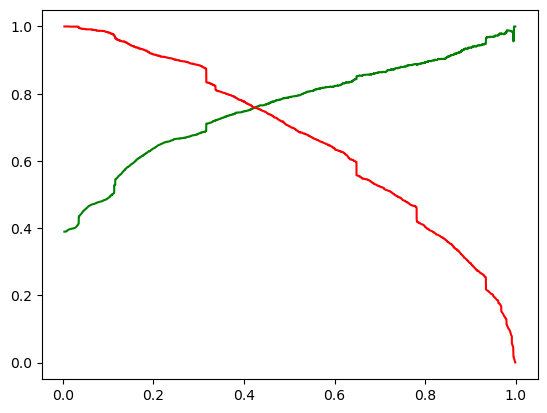

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Summary:

    -The ideal cut off for determining the final prediction was determined by taking into account Sensitivity and Specificity, after checking both Sensitivity-Specificity and Precision and Recall metrics.
    
    -The test set's accuracy, sensitivity, and specificity values are around 81%, 79%, and 82%, respectively, which is closer to the corresponding values determined using the training set.
    
    -Additionally, the lead score computed in the training data set indicates that the final projected model's conversion rate is about 80%.
    